In [1]:
! unzip dataset.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: dataset/places/bath_325.jpg  
  inflating: dataset/places/bath_331.jpg  
  inflating: dataset/places/bath_333.jpg  
  inflating: dataset/places/bath_334.jpg  
  inflating: dataset/places/bath_336.jpg  
  inflating: dataset/places/bath_339.jpg  
  inflating: dataset/places/bath_34.jpg  
  inflating: dataset/places/bath_340.jpg  
  inflating: dataset/places/bath_341.jpg  
  inflating: dataset/places/bath_342.jpg  
  inflating: dataset/places/bath_343.jpg  
  inflating: dataset/places/bath_346.jpg  
  inflating: dataset/places/bath_348.jpg  
  inflating: dataset/places/bath_349.jpg  
  inflating: dataset/places/bath_350.jpg  
  inflating: dataset/places/bath_351.jpg  
  inflating: dataset/places/bath_354.jpg  
  inflating: dataset/places/bath_355.jpg  
  inflating: dataset/places/bath_36.jpg  
  inflating: dataset/places/bath_361.jpg  
  inflating: dataset/places/bath_362.jpg  
  inflating: dataset/places/bat

In [2]:
# Импорт библиотек для создания и обучения нейросетевой модели, а так же визуализации данных.
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [9]:
# Импорт класса для создания датасета
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Генератор для тренировочных данных
# Использование нормализации данных и аугментации (приближение, изменения цвета, горизонтальное отзеркаливание).
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   zoom_range=.5,
                                   brightness_range=(0.5, 1.3),
                                   horizontal_flip=True,
                                   validation_split=.2)

# Генератор для проверочных данных
valid_datagen = ImageDataGenerator(rescale=1./255.,
                                   validation_split=.2)

# Тренировочный датасет
train_ds = train_datagen.flow_from_directory(
    'dataset',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32,
    subset='training'
)

# Проверочный датасет
valid_ds = valid_datagen.flow_from_directory(
    'dataset',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32,
    subset='validation'
)

Found 8200 images belonging to 2 classes.
Found 2049 images belonging to 2 classes.


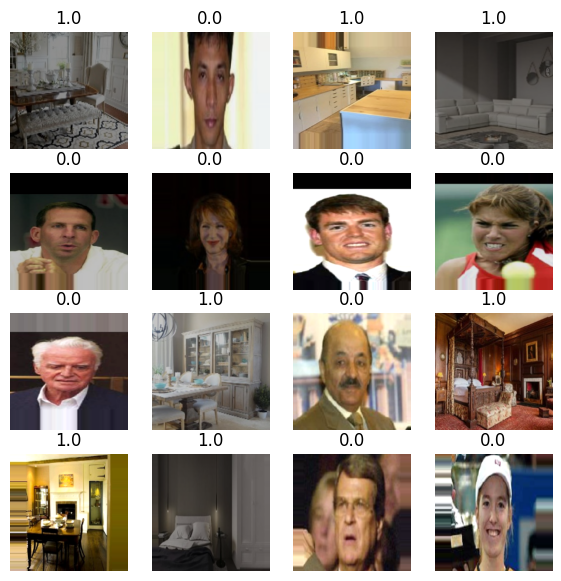

In [10]:
# Визуализация тренировочных изображений с применением аугментации
images, labels = next(iter(train_ds))
images, labels = images[:16], labels[:16]

fig = plt.figure(figsize=(7, 7))
for index, (img, label) in enumerate(zip(images, labels)):
    ax = fig.add_subplot(4, 4, index + 1)
    ax.imshow(img)
    ax.set_title(label)
    ax.axis('off')

plt.show()

In [7]:
# Функция создания архитектуру модели нейросети
def create_model(input_shape):
    input = keras.layers.Input(input_shape)

    x = keras.layers.Conv2D(8, (3, 3), padding='same', activation='relu', kernel_initializer='HeNormal')(input) # (224, 224, 64)
    x = keras.layers.MaxPool2D(padding='same')(x)

    x_1 = keras.layers.Conv2D(8, (3, 3), strides=2, padding='same', kernel_initializer='HeNormal', use_bias=False)(x)
    x_1 = keras.layers.BatchNormalization()(x_1)
    x_1 = keras.layers.Activation('relu')(x_1)
    x_1 = keras.layers.Conv2D(8, (3, 3), padding='same', kernel_initializer='HeNormal', use_bias=False)(x_1)
    x_1 = keras.layers.BatchNormalization()(x_1)

    x = keras.layers.Conv2D(8, (1, 1), strides=2, padding='same', kernel_initializer='HeNormal')(x)
    x = keras.layers.Add()([x, x_1])
    x = keras.layers.Activation('relu')(x)

    x_1 = keras.layers.Conv2D(16, (3, 3), strides=2, padding='same', kernel_initializer='HeNormal', use_bias=False)(x)
    x_1 = keras.layers.BatchNormalization()(x_1)
    x_1 = keras.layers.Activation('relu')(x_1)
    x_1 = keras.layers.Conv2D(16, (3, 3), padding='same', kernel_initializer='HeNormal', use_bias=False)(x_1)
    x_1 = keras.layers.BatchNormalization()(x_1)

    x = keras.layers.Conv2D(16, (1, 1), strides=2, padding='same', kernel_initializer='HeNormal')(x)
    x = keras.layers.Add()([x, x_1])
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Dropout(.3)(x)

    x_1 = keras.layers.Conv2D(32, (3, 3), strides=2, padding='same', kernel_initializer='HeNormal', use_bias=False)(x)
    x_1 = keras.layers.BatchNormalization()(x_1)
    x_1 = keras.layers.Activation('relu')(x_1)
    x_1 = keras.layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='HeNormal', use_bias=False)(x_1)
    x_1 = keras.layers.BatchNormalization()(x_1)

    x = keras.layers.Conv2D(32, (1, 1), strides=2, padding='same', kernel_initializer='HeNormal')(x)
    x = keras.layers.Add()([x, x_1])
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Dropout(.5)(x)

    x = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='HeNormal')(x)

    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dropout(.6)(x)
    output = keras.layers.Dense(1, activation='sigmoid')(x)


    model = keras.models.Model(input, output)
    return model

# Создание и компляция модели
model = create_model((224, 224, 3))
model.compile(optimizer=keras.optimizers.AdamW(),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=[keras.metrics.BinaryAccuracy()])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 224, 224,  │        224 │ input_layer[0][0] │
│                     │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 112, 112,  │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 56, 56, 8) │        576 │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 56, 56, 8) │         32 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 56, 56, 8) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 56, 56, 8) │        576 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 56, 56, 8) │         72 │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56, 8) │         32 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 56, 56, 8) │          0 │ conv2d_3[0][0],   │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 56, 56, 8) │          0 │ add[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 28, 28,    │      1,152 │ activation_1[0][… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │         64 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 28, 28,    │      2,304 │ activation_2[0][… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 28, 28,    │        144 │ activation_1[0][… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │         64 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 28, 28,    │          0 │ conv2d_6[0][0], 

 Total params: 29,145 (113.85 KB)

 Trainable params: 28,921 (112.97 KB)

 Non-trainable params: 224 (896.00 B)

In [8]:
# Обучение модели
history = model.fit(train_ds, epochs=8, validation_data=valid_ds)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
257/257 ━━━━━━━━━━━━━━━━━━━━ 124s 433ms/step - binary_accuracy: 0.7151 - loss: 0.5896 - val_binary_accuracy: 0.5588 - val_loss: 1.6220
Epoch 2/8
257/257 ━━━━━━━━━━━━━━━━━━━━ 104s 405ms/step - binary_accuracy: 0.9538 - loss: 0.1352 - val_binary_accuracy: 0.9502 - val_loss: 0.1437
Epoch 3/8
257/257 ━━━━━━━━━━━━━━━━━━━━ 106s 412ms/step - binary_accuracy: 0.9694 - loss: 0.1001 - val_binary_accuracy: 0.9492 - val_loss: 0.1411
Epoch 4/8
257/257 ━━━━━━━━━━━━━━━━━━━━ 104s 402ms/step - binary_accuracy: 0.9757 - loss: 0.0750 - val_binary_accuracy: 0.9663 - val_loss: 0.1112
Epoch 5/8
257/257 ━━━━━━━━━━━━━━━━━━━━ 110s 428ms/step - binary_accuracy: 0.9767 - loss: 0.0786 - val_binary_accuracy: 0.9834 - val_loss: 0.0521
Epoch 6/8
257/257 ━━━━━━━━━━━━━━━━━━━━ 106s 413ms/step - binary_accuracy: 0.9809 - loss: 0.0571 - val_binary_accuracy: 0.8736 - val_loss: 0.3085
Epoch 7/8
257/257 ━━━━━━━━━━━━━━━━━━━━ 103s 399ms/step - binary_accuracy: 0.9834 - loss: 0.0525 - val_binary_accuracy: 0.7643 - va

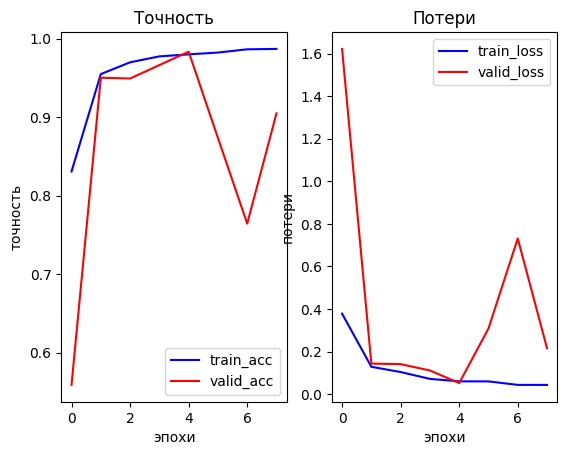

In [13]:
# Визуализация результатов обучения
hist = history.history

plt.subplot(1, 2, 1)
plt.plot(hist['binary_accuracy'], color='blue', label='train_acc')
plt.plot(hist['val_binary_accuracy'], color='red', label='valid_acc')
plt.title('Точность')
plt.xlabel('эпохи')
plt.ylabel('точность')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist['loss'], color='blue', label='train_loss')
plt.plot(hist['val_loss'], color='red', label='valid_loss')
plt.title('Потери')
plt.xlabel('эпохи')
plt.ylabel('потери')
plt.legend()

plt.show()

In [11]:
loss, acc = model.evaluate(valid_ds)
print(f'Потери: {round(loss, 3)}; Точность: {round(acc, 3)}')

65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - binary_accuracy: 0.9087 - loss: 0.2186
Потери: 0.216; Точность: 0.905


In [12]:
# Сохранение модели
model.save('model.keras')